# Relativité

Tout le monde connait la formule $E=mc^2$ . Mais que vaut exactement l’énergie de masse d’une pomme de 200g ?

In [1]:
masse_d_un_pomme = 0.2
c = 3E8

energie_masse_pomme = masse_d_un_pomme * c**2
print(f"L'énergie de masse d'une pomme est {energie_masse_pomme:.3e} J")

L'énergie de masse d'une pomme est 1.800e+16 J


# Formule de Simpson


In [4]:
def simpson_slow(f, a, b, N):
    Delta_x = (b-a)/N
    resultat = 0
    for i in range(N):
        x_i = a + Delta_x*i
        resultat += Delta_x * (f(x_i) + 4*f(x_i + Delta_x/2) + f(x_i + Delta_x))/6
    return resultat

def f(x):
    return x

simpson_slow(f, 0, 1, 100)

0.5

In [7]:
def simpson_fast(f, a, b, N):
    Delta_x = (b-a)/N
    intervalle = a + np.arange(N)*Delta_x
    return Delta_x * np.sum( f(intervalle) + 4*f(intervalle + Delta_x/2) + f(intervalle + Delta_x))/6

In [8]:
simpson_fast(f, 0, 1, 100)

0.5000000000000002

In [12]:
def f(x):
    return 1/(1 + x**2)

%timeit simpson_slow(f, 0, 1, 1000)

%timeit simpson_fast(f, 0, 1, 1000)

569 µs ± 9.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
24.6 µs ± 442 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
N = 100
liste_N = np.arange(1, 100)
liste_ecart = np.array([np.abs(simpson_fast(f, 0, 1, N) - np.pi/4) for N in liste_N])

Text(0, 0.5, 'Erreur')

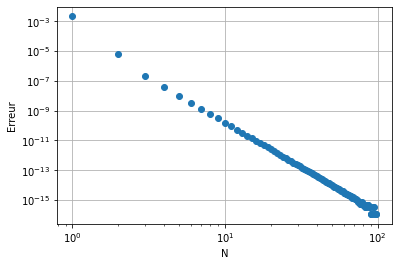

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.loglog(liste_N, liste_ecart, 'o')
plt.grid()
plt.xlabel('N')
plt.ylabel('Erreur')

# Gravimètre

In [30]:
import numpy as np

date, mesure_CAG, mesure_iGRAV, residu = np.loadtxt('CAGiGrav.txt', 
                                                     skiprows=1, unpack=True)

Text(0.5, 0, 'Jour')

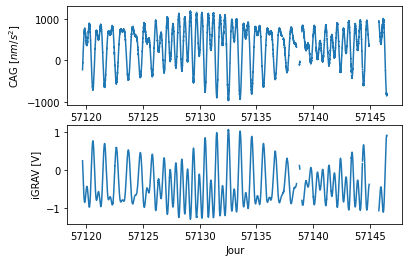

In [39]:
plt.subplot(2, 1, 1)
plt.plot(date, mesure_CAG)
plt.ylabel('CAG [$nm/s^2$]')
plt.subplot(2, 1, 2)
plt.plot(date, mesure_iGRAV)
plt.ylabel('iGRAV [V]')

plt.xlabel('Jour')

In [44]:
mask = ~(np.isnan(mesure_CAG) | np.isnan(mesure_iGRAV))
mesure_CAG_filtree = mesure_CAG[mask]
mesure_iGRAV_filtree = mesure_iGRAV[mask]


In [48]:
moyenne_g = np.mean(mesure_CAG_filtree)*1E-9 + 9.808_907_500
print(moyenne_g)

9.808907856904671


In [53]:
ecart_type_g = np.std(mesure_CAG_filtree)*1E-9 
print(ecart_type_g)

4.6460121353707873e-07


Text(0.5, 0, 'Jour')

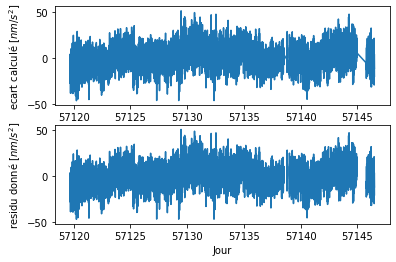

In [52]:
𝐾 = -898.25

ecart = mesure_CAG_filtree - mesure_iGRAV_filtree*K


plt.subplot(2, 1, 1)
plt.plot(date[mask], ecart)
plt.ylabel('ecart calculé [$nm/s^2$]')
plt.subplot(2, 1, 2)
plt.plot(date, residu)
plt.ylabel('residu donné [$nm/s^2$]')

plt.xlabel('Jour')

In [54]:
np.loadtxt?